In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [23]:
matches = pd.read_csv('/Users/amastikbayev/Desktop/experience/matches.csv')
corners = pd.read_csv('/Users/amastikbayev/Desktop/experience/corners.csv')
teams = pd.read_csv('/Users/amastikbayev/Desktop/experience/teams.csv')
match_events = pd.read_csv('/Users/amastikbayev/Desktop/experience/match_events.csv')
players = pd.read_csv('/Users/amastikbayev/Desktop/experience/players.csv')
corners_analysis = pd.read_csv('/Users/amastikbayev/Desktop/experience/corners_analysis.csv')

In [24]:
matches.head()

,match_id,date,home_team,away_team,home_goals,away_goals
0,1,2023-08-19,Reggina,Sudtirol,0,1
1,2,2024-03-31,Porma,Frosinone,1,1
2,3,2024-04-30,Escoli,Porma,4,1
3,4,2024-01-19,Bari,Porma,2,1
4,5,2023-08-23,Como,Porma,3,1


In [25]:
corners.head()

,corner_id,match_id,team,minute,x_coordinate,y_coordinate,side
0,1,1,Reggina,52,18.67,91.25,Right
1,2,1,Sudtirol,80,40.57,33.43,Right
2,3,1,Sudtirol,70,56.24,19.51,Left
3,4,1,Reggina,2,83.21,77.99,Right
4,5,1,Reggina,24,6.26,62.78,Right


In [26]:
teams.head()

,team_id,team_name,city,stadium,league
0,1,Venezia,Venezia City,Venezia Arena,Serie B
1,2,Porma,Porma City,Porma Arena,Serie B
2,3,Escoli,Escoli City,Escoli Arena,Serie B
3,4,Impoli,Impoli City,Impoli Arena,Serie B
4,5,Bari,Bari City,Bari Arena,Serie B


In [65]:
match_events.head(20)

,event_id,match_id,event_type,team_id,player_id,event_time_sec,minute,second,x_coord,y_coord,outcome,xg,assist_id
0,1,1,corner,14,280,3147,52,27,18.67,91.25,in_play,0.015,NaN
1,2,1,corner,18,353,4853,80,53,40.57,33.43,in_play,0.034,NaN
2,3,1,corner,18,355,4226,70,26,56.24,19.51,in_play,0.034,NaN
3,4,1,corner,14,271,172,2,52,83.21,77.99,in_play,0.045,NaN
4,5,1,corner,14,264,1455,24,15,6.26,62.78,in_play,0.055,NaN
5,6,1,corner,14,279,1588,26,28,5.26,7.14,in_play,0.032,NaN
6,7,1,corner,18,357,1319,21,59,97.24,94.51,in_play,0.045,NaN
7,8,2,corner,9,169,103,1,43,85.72,63.41,in_play,0.001,NaN
8,9,2,corner,9,169,4692,78,12,56.64,17.34,in_play,0.060,NaN
9,10,2,corner,2,21,1348,22,28,41.33,74.23,in_play,0.013,NaN


In [28]:
players.head()

,player_id,player_name,team_id,team_name
0,1,VEN_P01,1,Venezia
1,2,VEN_P02,1,Venezia
2,3,VEN_P03,1,Venezia
3,4,VEN_P04,1,Venezia
4,5,VEN_P05,1,Venezia


In [29]:
corners_analysis.head()

,corner_id,match_id,team_id,delivery_type,delivery_zone,players_in_box,opponent_def_setup,shot_outcome,xg_after_corner,pass_chain_length,x_coordinate,y_coordinate
0,1,1,14,out_swing,far,5,mixed,cleared,0.006,1,18.67,91.25
1,2,1,18,cutback,center,1,zone,missed,0.008,2,40.57,33.43
2,3,1,18,short,near,3,man,cleared,0.014,1,56.24,19.51
3,4,1,14,in_swing,far,2,man,cleared,0.011,6,83.21,77.99
4,5,1,14,short,center,3,mixed,cleared,0.019,1,6.26,62.78


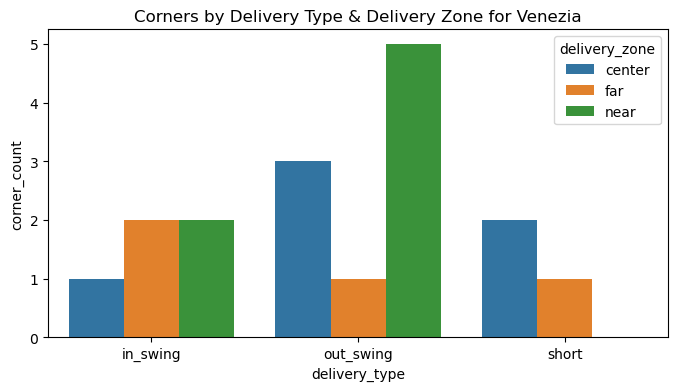

In [89]:
# Пример: считать количество угловых по delivery_type и delivery_zone для команды "Venezia"
df = corners_analysis.merge(teams, on='team_id')
df_venezia = df[df['team_name'] == 'Venezia']

corner_counts = df_venezia.groupby(['delivery_type', 'delivery_zone']).size().reset_index(name='corner_count')

plt.figure(figsize=(8,4))
sns.barplot(data=corner_counts, x='delivery_type', y='corner_count', hue='delivery_zone')
plt.title('Corners by Delivery Type & Delivery Zone for Venezia')
plt.show()

In [31]:
# Helper: filter matches for season
season_start = pd.Timestamp('2023-08-01')
season_end = pd.Timestamp('2024-05-31')
matches['date'] = pd.to_datetime(matches['date'])
season_matches = matches[(matches['date'] >= season_start) & (matches['date'] <= season_end)]

In [60]:
# 1. Total number of corners by delivery_type and delivery_zone per team
q1 = (
    corners_analysis
    .merge(teams, on='team_id')
    .query("match_id in @season_matches.match_id and team_name in ['Venezia', 'Palermo']")
    .groupby(['team_id', 'team_name', 'delivery_type', 'delivery_zone'])
    .size()
    .reset_index(name='corner_count')
    .sort_values(['team_id', 'delivery_type', 'delivery_zone'])
)

# Example output
print("Query 1 Result:")
q1

Query 1 Result:


,team_id,team_name,delivery_type,delivery_zone,corner_count
0,1,Venezia,in_swing,center,1
1,1,Venezia,in_swing,far,2
2,1,Venezia,in_swing,near,2
3,1,Venezia,out_swing,center,3
4,1,Venezia,out_swing,far,1
5,1,Venezia,out_swing,near,5
6,1,Venezia,short,center,2
7,1,Venezia,short,far,1
8,19,Palermo,cutback,center,1
9,19,Palermo,cutback,far,2


/var/folders/k9/gcc2n68913jgqkx56vmv734w0000gn/T/ipykernel_29995/783748000.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=q1, x='delivery_type', y='corner_count', hue='team_name', ci=None)


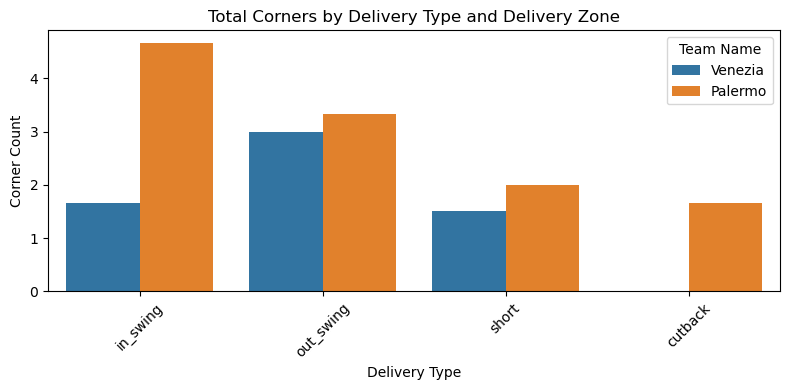

In [90]:
plt.figure(figsize=(8, 4))
sns.barplot(data=q1, x='delivery_type', y='corner_count', hue='team_name', ci=None)
plt.title('Total Corners by Delivery Type and Delivery Zone')
plt.xlabel('Delivery Type')
plt.ylabel('Corner Count')
plt.xticks(rotation=45)
plt.legend(title='Team Name')
plt.tight_layout()
plt.show()

In [59]:

# 2. Conversion rate of corners to shots on target/goals for Venezia
corners_v = (
    corners_analysis
    .merge(teams, on='team_id')
    .query("team_name == 'Venezia'")
    .assign(is_scoring_opportunity=lambda df: df['shot_outcome'].isin(['goal', 'shot_on_target']).astype(int))
)
q2 = (
    corners_v
    .groupby('delivery_type')
    .agg(
        total_corners=('corner_id', 'count'),
        scoring_opportunities=('is_scoring_opportunity', 'sum')
    )
    .assign(conversion_rate_pct=lambda df: round(df['scoring_opportunities'] / df['total_corners'] * 100, 2))
    .sort_values('conversion_rate_pct', ascending=False)
    .reset_index()
)

# Example output
print("Query 2 Result:")
q2

Query 2 Result:


,delivery_type,total_corners,scoring_opportunities,conversion_rate_pct
0,out_swing,9,4,44.44
1,in_swing,5,2,40.00
2,short,3,0,0.00


In [92]:
# 3. Time distribution of corners for Palermo (10-min bins)
q3 = (
    match_events
    .merge(teams, on='team_id')
    .query("event_type == 'corner' and team_name == 'Palermo' and match_id in @season_matches.match_id")
    .assign(minute_bin_start=lambda df: (df['minute'] // 10) * 10)
    .groupby('minute_bin_start')
    .size()
    .reset_index(name='corners_count')
    .sort_values('minute_bin_start')
)

print("Query 3 Result:")
q3

Query 3 Result:


,minute_bin_start,corners_count
0,0,2
1,10,4
2,20,4
3,30,4
4,40,4
5,50,1
6,60,5
7,70,6
8,80,3


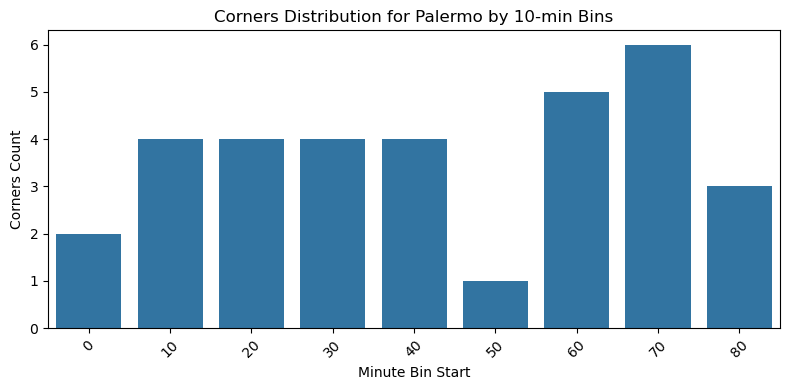

In [93]:
# chart of time distribution of corners for Palermo (10-min bins)

plt.figure(figsize=(8, 4))
sns.barplot(data=q3, x='minute_bin_start', y='corners_count')
plt.title('Corners Distribution for Palermo by 10-min Bins')
plt.xlabel('Minute Bin Start')
plt.ylabel('Corners Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [61]:
# 4. Average xG after corner by opponent_defense_shape for Venezia
q4 = (
    corners_analysis
    .merge(teams, on='team_id')
    .query("team_name == 'Venezia'")
    .groupby('opponent_def_setup')
    .agg(
        corner_events=('corner_id', 'count'),
        avg_xg_after_corner=('xg_after_corner', lambda x: round(x.mean(), 4))
    )
    .sort_values('avg_xg_after_corner', ascending=False)
    .reset_index()
)

print("Query 4 Result:")
q4

Query 4 Result:


,opponent_def_setup,corner_events,avg_xg_after_corner
0,man,8,0.1179
1,zone,6,0.0418
2,mixed,3,0.0117


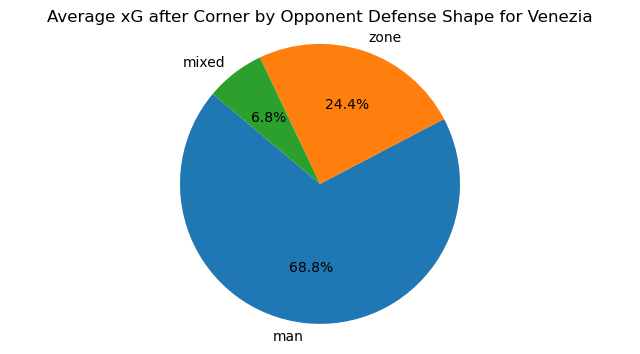

In [94]:
#piechart for Average xG after corner by opponent_defense_shape for Venezia
plt.figure(figsize=(8, 4))
plt.pie(q4['avg_xg_after_corner'], labels=q4['opponent_def_setup'], autopct='%1.1f%%', startangle=140)
plt.title('Average xG after Corner by Opponent Defense Shape for Venezia')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

In [57]:
# 5. Avg pass_chain_length by delivery_type and delivery_zone for both clubs
q5 = (round(
    corners_analysis
    .merge(teams, on='team_id')
    .query("team_name in ['Venezia', 'Palermo']")
    .groupby(['delivery_type', 'delivery_zone'])
    .agg(avg_pass_chain=('pass_chain_length', 'mean'))
    .sort_values('avg_pass_chain', ascending=False)
    .reset_index(),1)
)

print("Query 5 Result:")
q5

Query 5 Result:


,delivery_type,delivery_zone,avg_pass_chain
0,cutback,near,6.0
1,short,near,6.0
2,short,far,5.0
3,out_swing,center,4.5
4,in_swing,far,3.4
5,in_swing,near,3.1
6,cutback,far,3.0
7,short,center,2.8
8,out_swing,near,2.5
9,in_swing,center,2.0


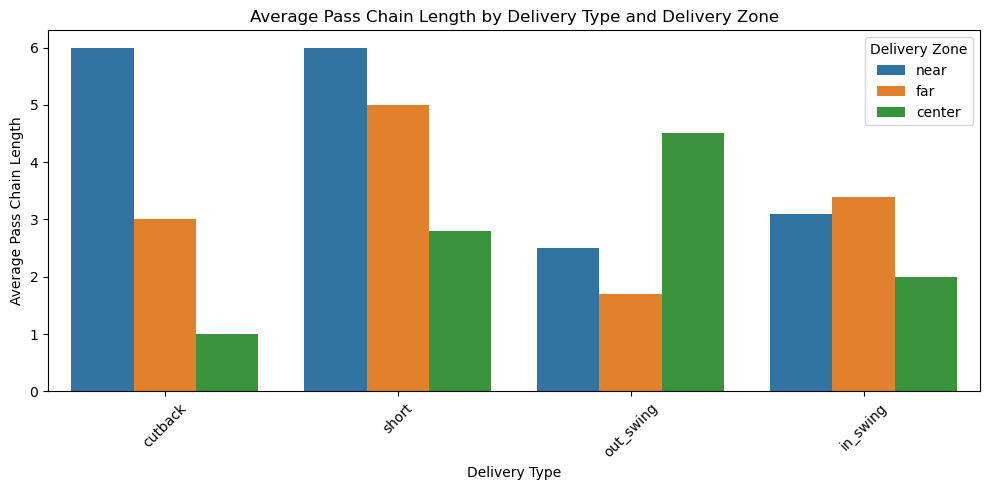

In [96]:
# chart for avg pass_chain_length by delivery_type and delivery_zone for both clubs
plt.figure(figsize=(10, 5))
sns.barplot(data=q5, x='delivery_type', y='avg_pass_chain', hue='delivery_zone')
plt.title('Average Pass Chain Length by Delivery Type and Delivery Zone')
plt.xlabel('Delivery Type')
plt.ylabel('Average Pass Chain Length')
plt.xticks(rotation=45)
plt.legend(title='Delivery Zone')
plt.tight_layout()
plt.show()

In [69]:
# 8. Effect of attackers in box on goal conversion for Venezia
corner_goals = (
    corners_analysis
    .merge(teams, on='team_id')
    .query("team_name == 'Venezia'")
    .assign(goal_flag=lambda df: (df['shot_outcome'] == 'goal').astype(int))
)
q8 = (
    corner_goals
    .groupby('players_in_box')
    .agg(
        total_corners=('corner_id', 'count'),
        goals_scored=('goal_flag', 'sum')
    )
    .assign(goal_conversion_pct=lambda df: round(df['goals_scored'] / df['total_corners'] * 100, 2))
    .sort_values('players_in_box')
    .reset_index()
)

# Example output
print("Query 8 Result:")
q8

Query 8 Result:


,players_in_box,total_corners,goals_scored,goal_conversion_pct
0,1,3,0,0.0
1,2,4,0,0.0
2,3,2,1,50.0
3,4,2,0,0.0
4,6,3,0,0.0
5,7,2,0,0.0
6,8,1,0,0.0


In [48]:
# 10. Avg xG of shots after corners by delivery_zone for Palermo
q10 = (
    corners_analysis
    .merge(teams, on='team_id')
    .query("team_name == 'Palermo'")
    .groupby('delivery_zone')
    .agg(avg_xg=('xg_after_corner', lambda x: round(x.mean(), 4)))
    .sort_values('avg_xg', ascending=False)
    .reset_index()
)

print("Query 10 Result:")
q10

Query 10 Result:


,delivery_zone,avg_xg
0,center,0.0587
1,far,0.0450
2,near,0.0293


In [100]:
# 12. Avg corners per match for Venezia & Palermo
q12 = (
    corners_analysis
    .merge(teams, on='team_id')
    .query("team_name in ['Venezia', 'Palermo']")
    .groupby('team_name')
    .agg(
        total_corners=('corner_id', 'count'),
        matches_played=('match_id', 'nunique')
    )
    .assign(avg_corners_per_match=lambda df: round(df['total_corners'] / df['matches_played'], 2))
    .sort_values('avg_corners_per_match', ascending=False)
    .reset_index()
)

print("Query 12 Result:")
q12

Query 12 Result:


,team_name,total_corners,matches_played,avg_corners_per_match
0,Venezia,17,4,4.25
1,Palermo,33,8,4.12


In [45]:
# 13. Corner kick outcomes by delivery type for Venezia
q13 = (
    corners_analysis
    .merge(teams, on='team_id')
    .query("team_name == 'Venezia'")
    .groupby('delivery_type')
    .agg(
        total_corners=('corner_id', 'count'),
        goals=('shot_outcome', lambda x: (x == 'goal').sum()),
        shots_on_target=('shot_outcome', lambda x: (x == 'shot_on_target').sum()),
        missed_shots=('shot_outcome', lambda x: (x == 'missed').sum())
    )
    .assign(
        goal_conversion_rate_pct=lambda df: round(df['goals'] / df['total_corners'] * 100, 2),
        shot_on_target_rate_pct=lambda df: round(df['shots_on_target'] / df['total_corners'] * 100, 2)
    )
    .sort_values('total_corners', ascending=False)
    .reset_index()
)

print("Query 13 Result:")
q13

Query 13 Result:


,delivery_type,total_corners,goals,shots_on_target,missed_shots,goal_conversion_rate_pct,shot_on_target_rate_pct
0,out_swing,9,1,3,3,11.11,33.33
1,in_swing,5,0,2,0,0.00,40.00
2,short,3,0,0,0,0.00,0.00
